<a href="https://colab.research.google.com/github/RohitPadala/Implementation-Of-Various-ML-Models/blob/main/Set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------
*-Please rename the file as "Team01_Assignment2.ipynb"*

***Team number:*** 01

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***  Lokesh Aravind Saravanan, Shantanu Wadhwa, Shashank Kumar, Rohit Tulsi Padala

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021AAPS2906H, 2021A3PS2972H, 2021A8PS1670H, 2021AAPS1896H



This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

In [ ]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Reducing warning content
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv('/communities.data.csv')
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [ ]:
df.count()

state                  1994
county                 1994
community              1994
communityname          1994
fold                   1994
                       ... 
LemasPctPolicOnPatr    1994
LemasGangUnitDeploy    1994
LemasPctOfficDrugUn    1994
PolicBudgPerPop        1994
ViolentCrimesPerPop    1994
Length: 128, dtype: int64

In [ ]:
df.describe(include='all')

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994,1994,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994,1994,1994,1994,1994.000000,1994,1994.000000
unique,NaN,109,800,1828,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64,39,73,4,NaN,52,NaN
top,NaN,?,?,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,?,?,?,?,NaN,?,NaN
freq,NaN,1174,1177,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1675,1675,1675,1675,NaN,1675,NaN
mean,28.683551,NaN,NaN,NaN,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,...,0.065231,0.232854,0.161685,NaN,NaN,NaN,NaN,0.094052,NaN,0.237979
std,16.397553,NaN,NaN,NaN,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,...,0.109459,0.203092,0.229055,NaN,NaN,NaN,NaN,0.240328,NaN,0.232985
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,12.000000,NaN,NaN,NaN,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,...,0.020000,0.100000,0.020000,NaN,NaN,NaN,NaN,0.000000,NaN,0.070000
50%,34.000000,NaN,NaN,NaN,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,...,0.040000,0.170000,0.070000,NaN,NaN,NaN,NaN,0.000000,NaN,0.150000
75%,42.000000,NaN,NaN,NaN,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,...,0.070000,0.280000,0.190000,NaN,NaN,NaN,NaN,0.000000,NaN,0.330000


In [ ]:
df.replace('?', pd.NA, inplace=True)

In [ ]:
missing_values_count = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
state                     0
county                 1174
community              1177
communityname             0
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64


In [ ]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing values for each column
print("Percentage of Missing Values:")
print(missing_values_percentage)

Percentage of Missing Values:
state                   0.000000
county                 58.876630
community              59.027081
communityname           0.000000
fold                    0.000000
                         ...    
LemasPctPolicOnPatr    84.002006
LemasGangUnitDeploy    84.002006
LemasPctOfficDrugUn     0.000000
PolicBudgPerPop        84.002006
ViolentCrimesPerPop     0.000000
Length: 128, dtype: float64


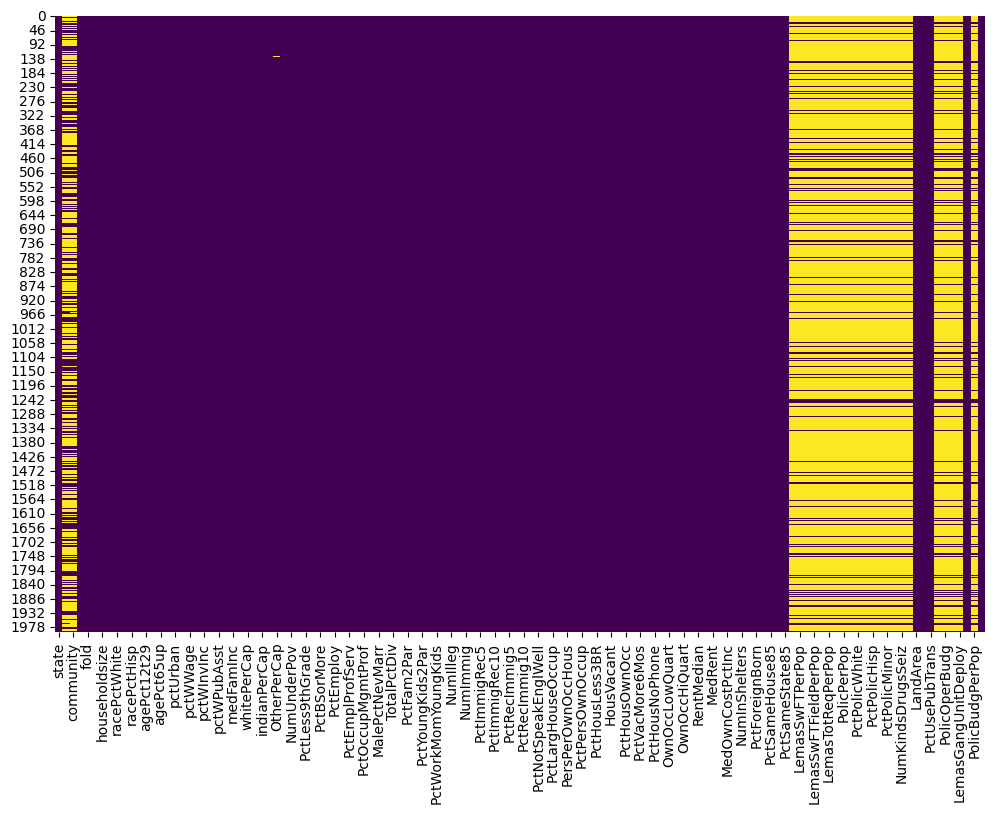

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

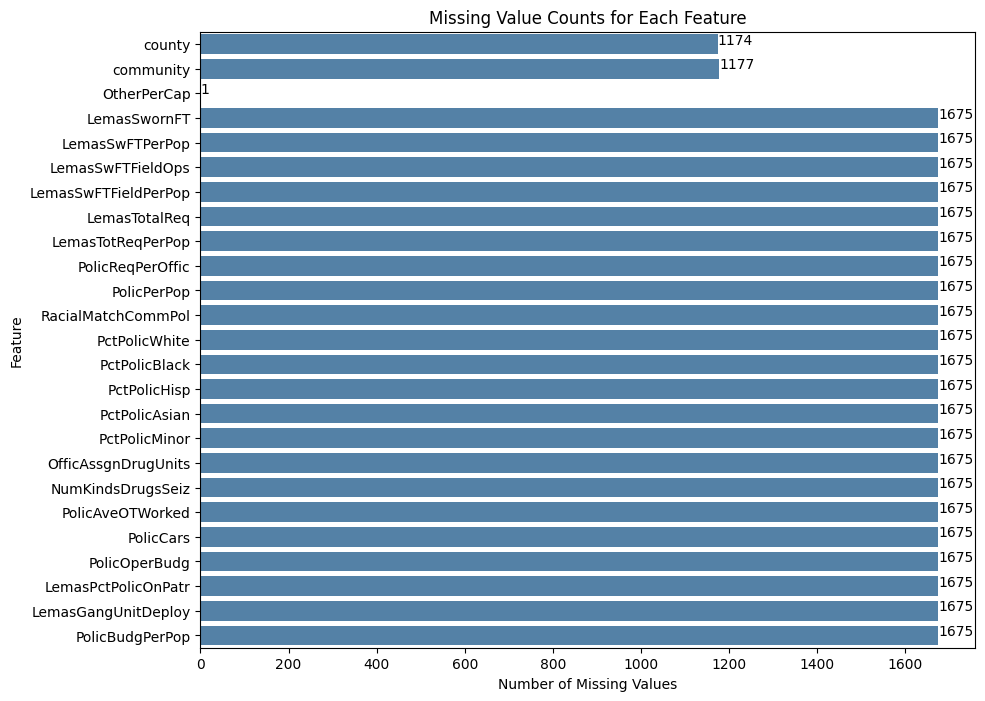

In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()]

# Create a DataFrame with column names and their respective missing value counts
missing_data = pd.DataFrame({
    'Feature': columns_with_missing_values,
    'NA_Count': df[columns_with_missing_values].isnull().sum().values
})

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='NA_Count', y='Feature', data=missing_data, color='steelblue')

# Add labels to the bars
for index, value in enumerate(missing_data['NA_Count']):
    plt.text(value, index, str(value))

# Set plot title and axis labels
plt.title('Missing Value Counts for Each Feature')
plt.xlabel('Number of Missing Values')
plt.ylabel('Feature')

# Show the plot
plt.show()

In [ ]:
# Set a threshold for the percentage of missing values (50%)
threshold = 0.5

# Calculate the threshold for the number of non-null values
min_non_null_values = len(df) * (1 - threshold)

# Drop columns with fewer non-null values than the threshold
df_cleaned = df.dropna(axis=1, thresh=min_non_null_values)

# Display information about the cleaned DataFrame
print("Info about the Cleaned DataFrame:")
print(df_cleaned.info())

Info about the Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 104 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(2)
memory usage: 1.6+ MB
None


In [ ]:
threshold = 0.01

# Calculate the variance for each column
variances = df_cleaned.var()

# Identify columns with variance below the threshold
low_variance_cols = variances[variances < threshold].index

# Remove columns with low variance from the DataFrame
df_filtered = df_cleaned.drop(columns=low_variance_cols)

# Display information about the DataFrame without degenerate variables
print("Info about the DataFrame without Degenerate Variables:")
print(df_filtered.info())

Info about the DataFrame without Degenerate Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 103 entries, state to ViolentCrimesPerPop
dtypes: float64(99), int64(2), object(2)
memory usage: 1.6+ MB
None


In [ ]:
df_filtered = df_filtered.drop(columns=['communityname'])
df_filtered = df_filtered.drop(columns=['fold'])
df_filtered = df_filtered.dropna(subset=['OtherPerCap'])

In [ ]:
# Display information about the modified DataFrame
print("Info about the DataFrame after modifications:")
print(df_filtered.info())

Info about the DataFrame after modifications:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Columns: 101 entries, state to ViolentCrimesPerPop
dtypes: float64(99), int64(1), object(1)
memory usage: 1.6+ MB
None


In [ ]:
df_filtered.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,16.401661,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dependent_variable = 'ViolentCrimesPerPop'

# Setting a threshold for correlation (low correlation  is < 0.25)
correlation_threshold = 0.25

# Calculate the correlation between each independent variable and the dependent variable
correlations = df_filtered.drop(columns=[dependent_variable]).corrwith(df_filtered[dependent_variable])

# Identify columns with correlation below the threshold
low_correlation_cols = correlations[abs(correlations) < correlation_threshold].index

# Remove columns with low correlation from the DataFrame
df_corr = df_filtered.drop(columns=low_correlation_cols)

# Display information about the DataFrame after removing low correlation variables
print("Info about the DataFrame after removing low correlation variables:")
print(df_corr.info())

Info about the DataFrame after removing low correlation variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   population           1993 non-null   float64
 1   racepctblack         1993 non-null   float64
 2   racePctWhite         1993 non-null   float64
 3   racePctHisp          1993 non-null   float64
 4   numbUrban            1993 non-null   float64
 5   medIncome            1993 non-null   float64
 6   pctWWage             1993 non-null   float64
 7   pctWInvInc           1993 non-null   float64
 8   pctWPubAsst          1993 non-null   float64
 9   medFamInc            1993 non-null   float64
 10  perCapInc            1993 non-null   float64
 11  blackPerCap          1993 non-null   float64
 12  OtherPerCap          1993 non-null   object 
 13  NumUnderPov          1993 non-null   float64
 14  PctPopUnderPov       

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Set a threshold for multicollinearity (e.g., 0.9 for high correlation)
multicollinearity_threshold = 0.9

# Calculate the correlation matrix between independent variables
correlation_matrix = df_corr.drop(columns=[dependent_variable]).corr()

# Find pairs of variables with absolute correlation greater than the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > multicollinearity_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Remove one variable from each highly correlated pair
variables_to_remove = set()
for pair in highly_correlated_pairs:
    variable_to_remove = min(pair, key=lambda x: df_corr[x].var())  # Remove the variable with the smaller variance
    variables_to_remove.add(variable_to_remove)

# Remove variables with high multicollinearity from the DataFrame
df_final = df_corr.drop(columns=list(variables_to_remove))

# Display information about the DataFrame after removing multicollinear variables
print("Info about the DataFrame after removing multicollinear variables:")
print(df_final.info())


Info about the DataFrame after removing multicollinear variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   racepctblack         1993 non-null   float64
 1   racePctWhite         1993 non-null   float64
 2   racePctHisp          1993 non-null   float64
 3   numbUrban            1993 non-null   float64
 4   medIncome            1993 non-null   float64
 5   pctWWage             1993 non-null   float64
 6   pctWInvInc           1993 non-null   float64
 7   pctWPubAsst          1993 non-null   float64
 8   blackPerCap          1993 non-null   float64
 9   OtherPerCap          1993 non-null   object 
 10  PctPopUnderPov       1993 non-null   float64
 11  PctLess9thGrade      1993 non-null   float64
 12  PctBSorMore          1993 non-null   float64
 13  PctUnemployed        1993 non-null   float64
 14  PctEmploy            1

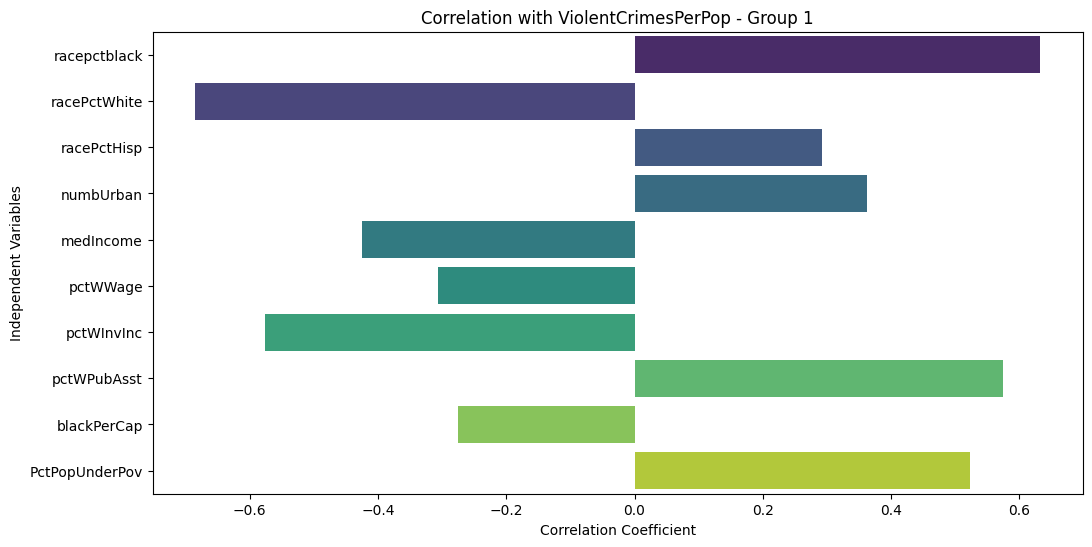

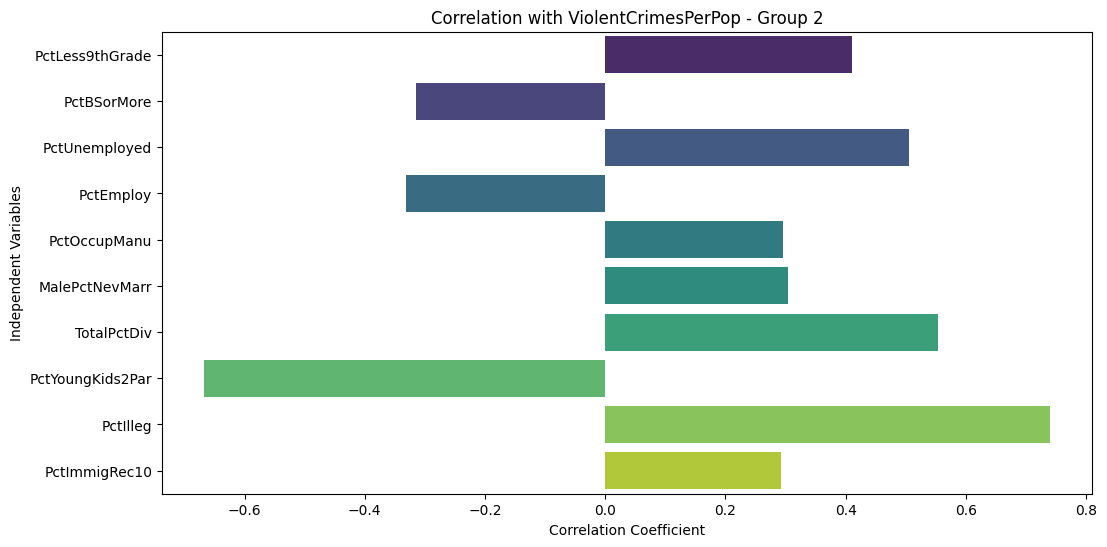

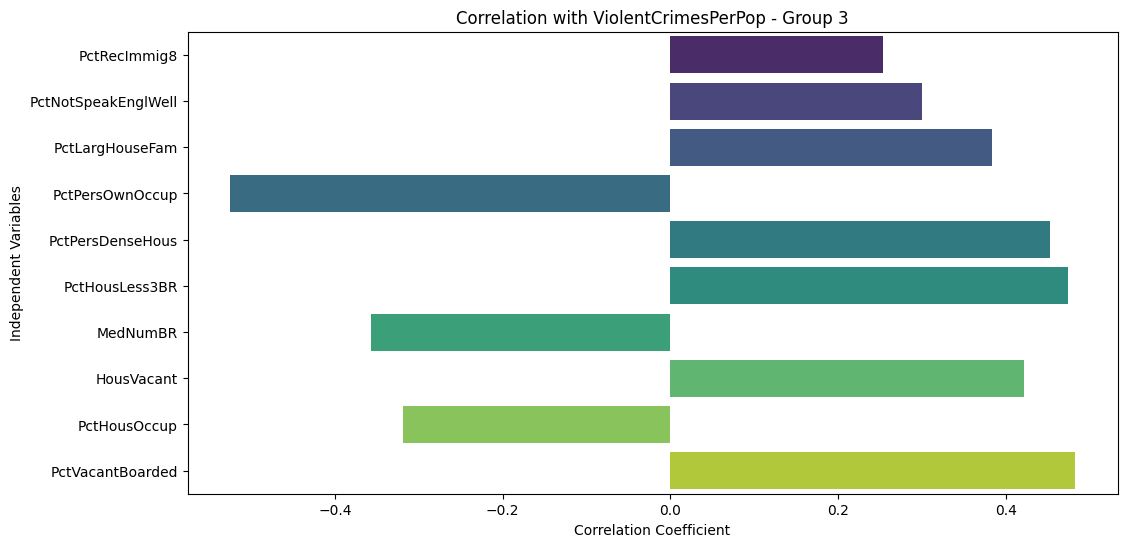

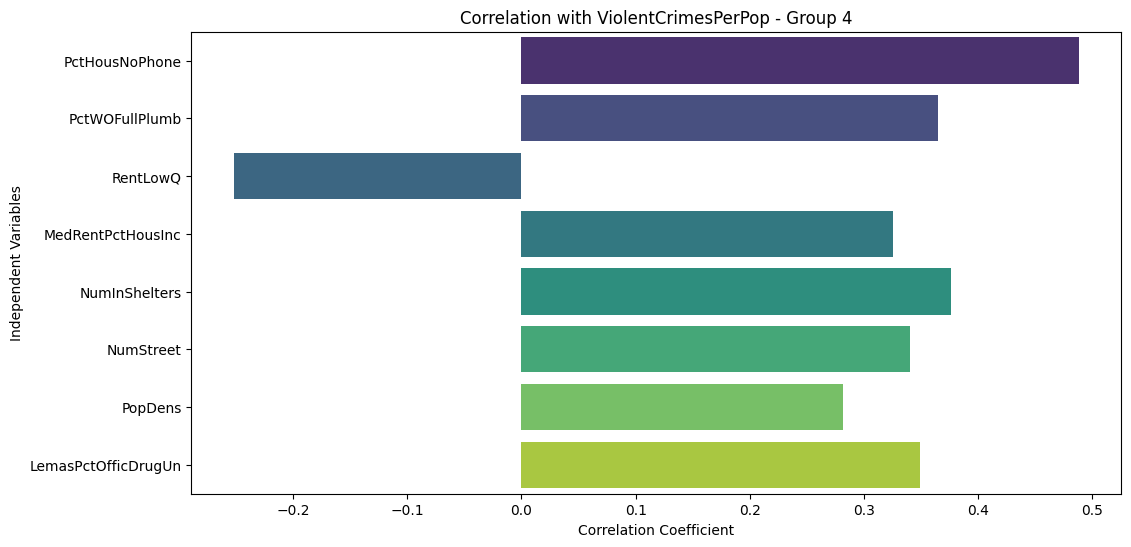

In [ ]:
# Calculate the correlation between each independent variable and the dependent variable
correlations = df_final.drop(columns=[dependent_variable]).corrwith(df_final[dependent_variable])

# Split the attributes into groups of 10
attribute_groups = [correlations[i:i+10] for i in range(0, len(correlations), 10)]

# Create separate bar plots for each group
for idx, attributes in enumerate(attribute_groups):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=attributes.values, y=attributes.index, palette="viridis")
    plt.title(f'Correlation with {dependent_variable} - Group {idx + 1}')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Independent Variables')
    plt.show()

In [ ]:
# Calculating the correlation between each independent variable and the dependent variable
correlations = df_final.drop(columns=[dependent_variable]).corrwith(df_final[dependent_variable])

# Filtering columns with correlation above 0.5
selected_columns = correlations[(correlations) > 0.5].index

# Printing the selected columns
print("Columns with correlation above 0.5 with", dependent_variable)
print(selected_columns)

Columns with correlation above 0.5 with ViolentCrimesPerPop
Index(['racepctblack', 'pctWPubAsst', 'PctPopUnderPov', 'PctUnemployed',
       'TotalPctDiv', 'PctIlleg'],
      dtype='object')


In [ ]:
df_final = df_final.astype(float)

In [ ]:
df_final.isnull().sum()

racepctblack           0
racePctWhite           0
racePctHisp            0
numbUrban              0
medIncome              0
pctWWage               0
pctWInvInc             0
pctWPubAsst            0
blackPerCap            0
OtherPerCap            0
PctPopUnderPov         0
PctLess9thGrade        0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
PctOccupManu           0
MalePctNevMarr         0
TotalPctDiv            0
PctYoungKids2Par       0
PctIlleg               0
PctImmigRec10          0
PctRecImmig8           0
PctNotSpeakEnglWell    0
PctLargHouseFam        0
PctPersOwnOccup        0
PctPersDenseHous       0
PctHousLess3BR         0
MedNumBR               0
HousVacant             0
PctHousOccup           0
PctVacantBoarded       0
PctHousNoPhone         0
PctWOFullPlumb         0
RentLowQ               0
MedRentPctHousInc      0
NumInShelters          0
NumStreet              0
PopDens                0
LemasPctOfficDrugUn    0
ViolentCrimesPerPop    0


In [ ]:
def classify_crimes(crimeRate):
    if crimeRate < 0.1:
        return 'low'
    elif 0.1 <= crimeRate <= 0.2:
        return 'av-'
    elif 0.2 < crimeRate <= 0.35:
        return 'av+'
    else:
        return 'high'

In [ ]:
avg = df.iloc[:, -1].mean()
avg

0.2379789368104313

From this link we find that the 1995 US crime rate average number of violent crimes per 100K popuation is 5,278 per 100k:

https://ucr.fbi.gov/crime-in-the-u.s/1995/95sec2.pdf

In [ ]:
averageCrimes = 5278/100000

In [ ]:
df_final['Crime Classification'] = df_final['ViolentCrimesPerPop'].apply(classify_crimes)
df_final

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,PctHousNoPhone,PctWOFullPlumb,RentLowQ,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification
0,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.32,0.36,...,0.14,0.06,0.36,0.38,0.04,0.00,0.26,0.32,0.20,av-
1,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.33,0.22,...,0.16,0.00,0.42,0.29,0.00,0.00,0.12,0.00,0.67,high
2,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.27,0.28,...,0.47,0.45,0.27,0.48,0.00,0.00,0.21,0.00,0.43,high
3,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.39,0.36,...,0.11,0.11,0.75,0.63,0.00,0.00,0.39,0.00,0.12,av-
4,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.28,0.51,...,0.05,0.14,0.40,0.22,0.00,0.00,0.09,0.00,0.03,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.10,0.87,0.16,0.03,0.42,0.74,0.64,0.06,0.27,0.36,...,0.07,0.09,0.45,0.50,0.00,0.00,0.28,0.00,0.09,low
1990,0.46,0.28,0.32,0.06,0.28,0.76,0.30,0.37,0.26,0.23,...,0.17,0.37,0.54,0.69,0.01,0.00,0.37,0.00,0.45,high
1991,0.25,0.69,0.25,0.17,0.31,0.47,0.45,0.48,0.25,0.22,...,0.31,0.29,0.28,0.52,0.06,0.02,0.32,0.91,0.23,av+
1992,0.06,0.87,0.10,0.09,0.44,0.64,0.55,0.24,0.29,0.27,...,0.10,0.34,0.58,0.43,0.04,0.01,0.38,0.22,0.19,av-


In [ ]:
X=df_final.drop(['ViolentCrimesPerPop', 'Crime Classification'],axis=1)
Y=df_final['Crime Classification']

df_train = df_final.head(1500)
df_test = df_final.iloc[1500:]

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_train=df_train.drop(['ViolentCrimesPerPop', 'Crime Classification'],axis=1)
Y_train=df_train['Crime Classification']

X_test=df_test.drop(['ViolentCrimesPerPop', 'Crime Classification'],axis=1)
Y_test=df_test['Crime Classification']

In [ ]:
xnp = X_train.to_numpy()
ynp = Y_train.to_numpy()
xtnp = X_test.to_numpy()
ytnp = Y_test.to_numpy()

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, criterion='entropy'):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None
        self.default_class = None

    def fit(self, X, y):
        self.default_class = np.min(y)
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.bincount(y).argmax())

        idx, thr = self._best_split(X, y)

        if idx is not None:
            indices_left = X[:, idx] <= thr
            indices_right = ~indices_left

            left = self._grow_tree(X[indices_left], y[indices_left], depth + 1)
            right = self._grow_tree(X[indices_right], y[indices_right], depth + 1)

            return Node(feature_index=idx, threshold=thr, left=left, right=right)
        else:
            return Node(value=np.bincount(y).argmax())

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = np.bincount(y)
        if self.criterion == 'gini':
            impurity_func = self._calculate_gini
        elif self.criterion == 'entropy':
            impurity_func = self._calculate_entropy
        else:
            raise ValueError("Invalid criterion. Use 'gini' or 'entropy'.")

        best_impurity = impurity_func(num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            num_left = np.zeros_like(num_parent)
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                impurity_left = impurity_func(num_left)
                impurity_right = impurity_func(num_right)
                impurity = (i * impurity_left + (m - i) * impurity_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if impurity < best_impurity:
                    best_impurity = impurity
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _calculate_gini(self, num_samples):
        total = np.sum(num_samples)
        return 1.0 - sum((n / total) ** 2 for n in num_samples)

    def _calculate_entropy(self, num_samples):
        total = np.sum(num_samples)
        return -sum((n / total) * np.log2((n / total) + 1e-10) for n in num_samples)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x, node=None):
        node = node or self.tree
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            if node.left is not None:
                return self._predict(x, node.left)
            else:
                return self.default_class
        else:
            if node.right is not None:
                return self._predict(x, node.right)
            else:
                return self.default_class

class_mapping = {'low': 0, 'av-': 1, 'av+': 2, 'high': 3}
reverse_mapping = {0: 'low', 1: 'av-', 2: 'av+', 3:'high'}

Y_train_mapped = np.array([class_mapping[label] for label in ynp])
Y_test_mapped = np.array([class_mapping[label] for label in ytnp])

default_class = 0  # Choose a default class (e.g., class 0)
max_depth_values = [2, 4, 6, 8, 10]

# Lists to store training and test accuracies for each max_depth
train_accuracies = []
test_accuracies = []

for max_depth in max_depth_values:
    clf_custom = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf_custom.fit(xnp, Y_train_mapped)

    # Make predictions on the training and testing data
    y_train_pred = clf_custom.predict(xnp)
    y_test_pred = clf_custom.predict(xtnp)

    # Calculate accuracies
    accuracy_train = np.mean(Y_train_mapped == y_train_pred)
    accuracy_test = np.mean(ytnp == [reverse_mapping[i] for i in y_test_pred])

    # Append accuracies to lists
    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)

    # Print results for each max_depth
    print(f"Max Depth: {max_depth}, Training Accuracy: {accuracy_train}, Test Accuracy: {accuracy_test}")

Max Depth: 2, Training Accuracy: 0.5546666666666666, Test Accuracy: 0.5334685598377282
Max Depth: 4, Training Accuracy: 0.6226666666666667, Test Accuracy: 0.5740365111561866
Max Depth: 6, Training Accuracy: 0.692, Test Accuracy: 0.539553752535497
Max Depth: 8, Training Accuracy: 0.8173333333333334, Test Accuracy: 0.5091277890466531
Max Depth: 10, Training Accuracy: 0.918, Test Accuracy: 0.48073022312373226


## **_2.2 Insights drawn (plots, markdown explanations)_**

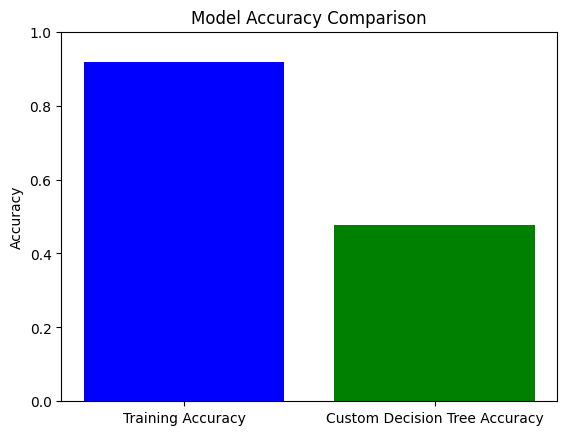

In [ ]:
accuracy_data = [accuracy_train, accuracy_custom]
labels = ['Training Accuracy', 'Custom Decision Tree Accuracy']

plt.bar(labels, accuracy_data, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

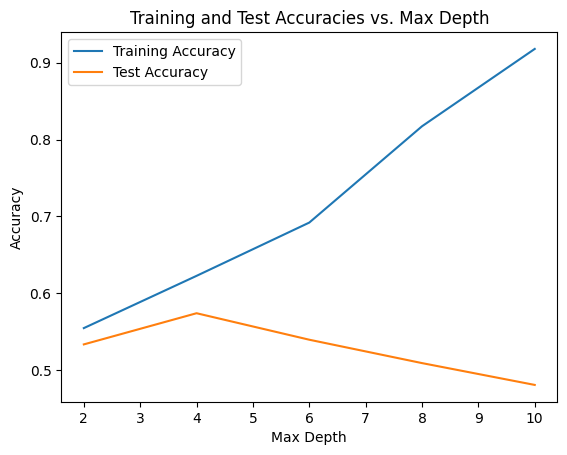

In [ ]:
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. Max Depth')
plt.legend()
plt.show()

As seen from the plot, Decision Tree Accuracy is lower than the training accuracy as the model slightly overfit to our current dataset. We have tried adjusting maximum depth and checking the impact on testing vs training accuracy and see that increasing max depth causes further decrease in test accuracy while the training accuracy increases. The most optimal value is max_depth=4 for the best test accuracy possible with minimal overfitting.

#***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_ada = df_train
df_ada['weights'] = 1/df_ada.shape[0]
df_ada['label'] = Y_train_mapped # have to put correct y_train here
#print(df_ada)
X_ada = df_ada.iloc[:,:-4].values
#print(X_ada)
Y_ada = df_ada.iloc[:,-1].values
print(Y_ada)

[1 3 3 ... 0 1 0]


In [ ]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_ada,Y_ada)

DecisionTreeClassifier(max_depth=3)

In [ ]:
df_ada['y_pred'] = dt1.predict(X_ada)
df_ada

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred
0,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.32,0.36,...,0.38,0.04,0.0,0.26,0.32,0.20,av-,0.000667,1,0
1,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.33,0.22,...,0.29,0.00,0.0,0.12,0.00,0.67,high,0.000667,3,1
2,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.27,0.28,...,0.48,0.00,0.0,0.21,0.00,0.43,high,0.000667,3,3
3,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.39,0.36,...,0.63,0.00,0.0,0.39,0.00,0.12,av-,0.000667,1,2
4,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.28,0.51,...,0.22,0.00,0.0,0.09,0.00,0.03,low,0.000667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.13,0.78,0.36,0.02,0.40,0.87,0.52,0.07,0.33,0.25,...,0.21,0.00,0.0,0.18,0.00,0.11,av-,0.000667,1,1
1496,0.04,0.59,0.62,0.00,0.08,0.42,0.35,0.75,0.13,0.15,...,0.62,0.00,0.0,0.18,0.00,0.12,av-,0.000667,1,1
1497,0.07,0.92,0.03,0.06,0.47,0.72,0.52,0.19,0.40,0.27,...,0.41,0.00,0.0,0.13,0.00,0.06,low,0.000667,0,0
1498,0.20,0.75,0.10,0.04,0.58,0.91,0.47,0.14,0.34,0.36,...,0.44,0.00,0.0,0.23,0.00,0.12,av-,0.000667,1,1


In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

df_ada['result'] = abs((df_ada['y_pred'] - df_ada['label']) * df_ada['weights'])

# Sum the values along the rows and store it in a variable
sum_result1 = df_ada['result'].sum()
alpha1 = calculate_model_weight(sum_result1)
alpha1

-0.03201092938246551

In [ ]:
# Step 4 - Update weights
def update_row_weights(row,alpha=alpha1):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [ ]:
df_ada['updated_weights'] = df_ada.apply(update_row_weights,axis=1)
df_ada

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred,result,updated_weights
0,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.32,0.36,...,0.0,0.26,0.32,0.20,av-,0.000667,1,0,0.000667,0.000646
1,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.33,0.22,...,0.0,0.12,0.00,0.67,high,0.000667,3,1,0.001333,0.000646
2,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.27,0.28,...,0.0,0.21,0.00,0.43,high,0.000667,3,3,0.000000,0.000688
3,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.39,0.36,...,0.0,0.39,0.00,0.12,av-,0.000667,1,2,0.000667,0.000646
4,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.28,0.51,...,0.0,0.09,0.00,0.03,low,0.000667,0,0,0.000000,0.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.13,0.78,0.36,0.02,0.40,0.87,0.52,0.07,0.33,0.25,...,0.0,0.18,0.00,0.11,av-,0.000667,1,1,0.000000,0.000688
1496,0.04,0.59,0.62,0.00,0.08,0.42,0.35,0.75,0.13,0.15,...,0.0,0.18,0.00,0.12,av-,0.000667,1,1,0.000000,0.000688
1497,0.07,0.92,0.03,0.06,0.47,0.72,0.52,0.19,0.40,0.27,...,0.0,0.13,0.00,0.06,low,0.000667,0,0,0.000000,0.000688
1498,0.20,0.75,0.10,0.04,0.58,0.91,0.47,0.14,0.34,0.36,...,0.0,0.23,0.00,0.12,av-,0.000667,1,1,0.000000,0.000688


In [ ]:
df_ada['updated_weights'].sum()
df_ada['nomalized_weights'] = df_ada['updated_weights']/df_ada['updated_weights'].sum()
df_ada

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred,result,updated_weights,nomalized_weights
0,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.32,0.36,...,0.26,0.32,0.20,av-,0.000667,1,0,0.000667,0.000646,0.000641
1,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.33,0.22,...,0.12,0.00,0.67,high,0.000667,3,1,0.001333,0.000646,0.000641
2,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.27,0.28,...,0.21,0.00,0.43,high,0.000667,3,3,0.000000,0.000688,0.000684
3,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.39,0.36,...,0.39,0.00,0.12,av-,0.000667,1,2,0.000667,0.000646,0.000641
4,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.28,0.51,...,0.09,0.00,0.03,low,0.000667,0,0,0.000000,0.000688,0.000684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.13,0.78,0.36,0.02,0.40,0.87,0.52,0.07,0.33,0.25,...,0.18,0.00,0.11,av-,0.000667,1,1,0.000000,0.000688,0.000684
1496,0.04,0.59,0.62,0.00,0.08,0.42,0.35,0.75,0.13,0.15,...,0.18,0.00,0.12,av-,0.000667,1,1,0.000000,0.000688,0.000684
1497,0.07,0.92,0.03,0.06,0.47,0.72,0.52,0.19,0.40,0.27,...,0.13,0.00,0.06,low,0.000667,0,0,0.000000,0.000688,0.000684
1498,0.20,0.75,0.10,0.04,0.58,0.91,0.47,0.14,0.34,0.36,...,0.23,0.00,0.12,av-,0.000667,1,1,0.000000,0.000688,0.000684


In [ ]:
df_ada['nomalized_weights'].sum()
df_ada['cumsum_upper'] = np.cumsum(df_ada['nomalized_weights'])
df_ada['cumsum_lower'] = df_ada['cumsum_upper'] - df_ada['nomalized_weights']
df_ada

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred,result,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.32,0.36,...,0.20,av-,0.000667,1,0,0.000667,0.000646,0.000641,0.000641,0.000000
1,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.33,0.22,...,0.67,high,0.000667,3,1,0.001333,0.000646,0.000641,0.001283,0.000641
2,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.27,0.28,...,0.43,high,0.000667,3,3,0.000000,0.000688,0.000684,0.001966,0.001283
3,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.39,0.36,...,0.12,av-,0.000667,1,2,0.000667,0.000646,0.000641,0.002608,0.001966
4,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.28,0.51,...,0.03,low,0.000667,0,0,0.000000,0.000688,0.000684,0.003291,0.002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.13,0.78,0.36,0.02,0.40,0.87,0.52,0.07,0.33,0.25,...,0.11,av-,0.000667,1,1,0.000000,0.000688,0.000684,0.997265,0.996581
1496,0.04,0.59,0.62,0.00,0.08,0.42,0.35,0.75,0.13,0.15,...,0.12,av-,0.000667,1,1,0.000000,0.000688,0.000684,0.997949,0.997265
1497,0.07,0.92,0.03,0.06,0.47,0.72,0.52,0.19,0.40,0.27,...,0.06,low,0.000667,0,0,0.000000,0.000688,0.000684,0.998633,0.997949
1498,0.20,0.75,0.10,0.04,0.58,0.91,0.47,0.14,0.34,0.36,...,0.12,av-,0.000667,1,1,0.000000,0.000688,0.000684,0.999316,0.998633


In [ ]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

index_values = create_new_dataset(df_ada)

#index_values

In [ ]:
second_df = df_ada.iloc[index_values,:-6]
second_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,RentLowQ,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label
495,0.30,0.69,0.17,0.12,0.60,0.70,0.63,0.19,0.38,0.43,...,0.56,0.51,0.07,0.02,0.29,1.00,0.17,av-,0.000667,1
967,0.05,0.91,0.15,0.03,0.32,0.68,0.39,0.18,0.27,0.28,...,0.44,0.51,0.00,0.00,0.26,0.00,0.24,av+,0.000667,2
848,0.01,0.84,0.05,0.04,1.00,0.58,1.00,0.12,0.24,0.66,...,1.00,0.33,0.00,0.00,0.34,0.00,0.04,low,0.000667,0
1349,0.01,0.01,0.92,0.08,0.30,0.61,0.28,0.86,0.28,0.24,...,0.55,0.74,0.00,0.01,0.84,0.00,0.52,high,0.000667,3
1320,0.15,0.65,0.70,0.09,0.23,0.56,0.38,0.41,0.19,0.19,...,0.17,0.40,0.00,0.01,0.15,0.00,0.39,high,0.000667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.03,0.91,0.06,0.02,0.74,0.82,0.74,0.06,0.72,0.27,...,0.80,0.53,0.01,0.00,0.04,0.00,0.07,low,0.000667,0
1249,0.55,0.48,0.16,0.12,0.20,0.48,0.38,0.34,0.18,0.21,...,0.19,0.52,0.01,0.01,0.16,0.45,0.47,high,0.000667,3
879,0.00,0.96,0.06,0.00,0.19,0.00,0.59,0.56,0.05,0.31,...,0.29,0.64,0.00,0.00,0.11,0.00,0.10,av-,0.000667,1
661,0.54,0.53,0.02,0.33,0.34,0.75,0.53,0.18,0.25,0.31,...,0.33,0.39,0.13,0.00,0.20,0.72,0.35,av+,0.000667,2


In [ ]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,:-4].values
print(X)
y = second_df.iloc[:,-1].values
print(y)
dt2.fit(X,y)

[[0.3  0.69 0.17 ... 0.02 0.29 1.  ]
 [0.05 0.91 0.15 ... 0.   0.26 0.  ]
 [0.01 0.84 0.05 ... 0.   0.34 0.  ]
 ...
 [0.   0.96 0.06 ... 0.   0.11 0.  ]
 [0.54 0.53 0.02 ... 0.   0.2  0.72]
 [0.2  0.54 0.53 ... 0.   0.22 0.  ]]
[1 2 0 ... 1 2 3]


DecisionTreeClassifier(max_depth=1)

In [ ]:
second_df['y_pred'] = dt2.predict(X)
second_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred
495,0.30,0.69,0.17,0.12,0.60,0.70,0.63,0.19,0.38,0.43,...,0.51,0.07,0.02,0.29,1.00,0.17,av-,0.000667,1,3
967,0.05,0.91,0.15,0.03,0.32,0.68,0.39,0.18,0.27,0.28,...,0.51,0.00,0.00,0.26,0.00,0.24,av+,0.000667,2,0
848,0.01,0.84,0.05,0.04,1.00,0.58,1.00,0.12,0.24,0.66,...,0.33,0.00,0.00,0.34,0.00,0.04,low,0.000667,0,0
1349,0.01,0.01,0.92,0.08,0.30,0.61,0.28,0.86,0.28,0.24,...,0.74,0.00,0.01,0.84,0.00,0.52,high,0.000667,3,3
1320,0.15,0.65,0.70,0.09,0.23,0.56,0.38,0.41,0.19,0.19,...,0.40,0.00,0.01,0.15,0.00,0.39,high,0.000667,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.03,0.91,0.06,0.02,0.74,0.82,0.74,0.06,0.72,0.27,...,0.53,0.01,0.00,0.04,0.00,0.07,low,0.000667,0,0
1249,0.55,0.48,0.16,0.12,0.20,0.48,0.38,0.34,0.18,0.21,...,0.52,0.01,0.01,0.16,0.45,0.47,high,0.000667,3,3
879,0.00,0.96,0.06,0.00,0.19,0.00,0.59,0.56,0.05,0.31,...,0.64,0.00,0.00,0.11,0.00,0.10,av-,0.000667,1,0
661,0.54,0.53,0.02,0.33,0.34,0.75,0.53,0.18,0.25,0.31,...,0.39,0.13,0.00,0.20,0.72,0.35,av+,0.000667,2,3


In [ ]:
second_df['result'] = abs((second_df['y_pred'] - second_df['label']) * second_df['weights'])

# Sum the values along the rows and store it in a variable
sum_result2 = second_df['result'].sum()
alpha2 = calculate_model_weight(sum_result2)
alpha2

-0.45093426164963185

In [ ]:
def update_row_weights(row,alpha=alpha2):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

second_df['nomalized_weights'].sum()

1.0000000000000002

In [ ]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [ ]:
second_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred,result,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
495,0.30,0.69,0.17,0.12,0.60,0.70,0.63,0.19,0.38,0.43,...,0.17,av-,0.000667,1,3,0.001333,0.000425,0.000376,0.000376,0.000000
967,0.05,0.91,0.15,0.03,0.32,0.68,0.39,0.18,0.27,0.28,...,0.24,av+,0.000667,2,0,0.001333,0.000425,0.000376,0.000752,0.000376
848,0.01,0.84,0.05,0.04,1.00,0.58,1.00,0.12,0.24,0.66,...,0.04,low,0.000667,0,0,0.000000,0.001047,0.000927,0.001679,0.000752
1349,0.01,0.01,0.92,0.08,0.30,0.61,0.28,0.86,0.28,0.24,...,0.52,high,0.000667,3,3,0.000000,0.001047,0.000927,0.002606,0.001679
1320,0.15,0.65,0.70,0.09,0.23,0.56,0.38,0.41,0.19,0.19,...,0.39,high,0.000667,3,0,0.002000,0.000425,0.000376,0.002983,0.002606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.03,0.91,0.06,0.02,0.74,0.82,0.74,0.06,0.72,0.27,...,0.07,low,0.000667,0,0,0.000000,0.001047,0.000927,0.997394,0.996467
1249,0.55,0.48,0.16,0.12,0.20,0.48,0.38,0.34,0.18,0.21,...,0.47,high,0.000667,3,3,0.000000,0.001047,0.000927,0.998321,0.997394
879,0.00,0.96,0.06,0.00,0.19,0.00,0.59,0.56,0.05,0.31,...,0.10,av-,0.000667,1,0,0.000667,0.000425,0.000376,0.998697,0.998321
661,0.54,0.53,0.02,0.33,0.34,0.75,0.53,0.18,0.25,0.31,...,0.35,av+,0.000667,2,3,0.000667,0.000425,0.000376,0.999073,0.998697


In [ ]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,:-5]
third_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred
633,0.17,0.86,0.00,0.00,0.10,0.23,0.37,0.90,0.18,0.17,...,0.37,0.00,0.00,0.10,0.00,0.03,low,0.000667,0,3
1219,0.15,0.55,0.50,0.06,0.33,0.60,0.38,0.54,0.45,0.21,...,0.63,0.01,0.27,0.28,0.00,0.19,av-,0.000667,1,3
928,0.10,0.64,0.25,0.06,0.59,0.78,0.53,0.24,0.38,0.45,...,0.60,0.00,0.00,0.25,0.00,0.26,av+,0.000667,2,0
1174,0.01,0.93,0.09,0.07,0.23,0.40,0.48,0.35,0.18,0.20,...,0.62,0.06,0.01,0.21,0.00,0.22,av+,0.000667,2,0
1322,0.05,0.86,0.17,0.00,0.19,0.64,0.40,0.15,0.08,0.16,...,0.65,0.00,0.00,0.19,0.00,0.03,low,0.000667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.09,0.83,0.16,0.00,0.21,0.33,0.41,0.25,0.12,0.20,...,0.44,0.00,0.00,0.19,0.00,0.20,av-,0.000667,1,0
1342,0.11,0.83,0.11,0.12,0.34,0.61,0.54,0.35,0.33,0.31,...,0.54,0.03,0.00,1.00,0.46,0.10,av-,0.000667,1,3
395,0.00,0.77,1.00,0.16,0.07,0.50,0.16,1.00,0.21,0.18,...,0.62,0.02,0.01,0.30,0.50,0.39,high,0.000667,3,3
684,0.09,0.86,0.06,0.03,0.78,0.82,0.71,0.14,0.29,0.93,...,0.55,0.01,0.00,0.05,0.00,0.04,low,0.000667,0,0


In [ ]:
second_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred,result,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
495,0.30,0.69,0.17,0.12,0.60,0.70,0.63,0.19,0.38,0.43,...,0.17,av-,0.000667,1,3,0.001333,0.000425,0.000376,0.000376,0.000000
967,0.05,0.91,0.15,0.03,0.32,0.68,0.39,0.18,0.27,0.28,...,0.24,av+,0.000667,2,0,0.001333,0.000425,0.000376,0.000752,0.000376
848,0.01,0.84,0.05,0.04,1.00,0.58,1.00,0.12,0.24,0.66,...,0.04,low,0.000667,0,0,0.000000,0.001047,0.000927,0.001679,0.000752
1349,0.01,0.01,0.92,0.08,0.30,0.61,0.28,0.86,0.28,0.24,...,0.52,high,0.000667,3,3,0.000000,0.001047,0.000927,0.002606,0.001679
1320,0.15,0.65,0.70,0.09,0.23,0.56,0.38,0.41,0.19,0.19,...,0.39,high,0.000667,3,0,0.002000,0.000425,0.000376,0.002983,0.002606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.03,0.91,0.06,0.02,0.74,0.82,0.74,0.06,0.72,0.27,...,0.07,low,0.000667,0,0,0.000000,0.001047,0.000927,0.997394,0.996467
1249,0.55,0.48,0.16,0.12,0.20,0.48,0.38,0.34,0.18,0.21,...,0.47,high,0.000667,3,3,0.000000,0.001047,0.000927,0.998321,0.997394
879,0.00,0.96,0.06,0.00,0.19,0.00,0.59,0.56,0.05,0.31,...,0.10,av-,0.000667,1,0,0.000667,0.000425,0.000376,0.998697,0.998321
661,0.54,0.53,0.02,0.33,0.34,0.75,0.53,0.18,0.25,0.31,...,0.35,av+,0.000667,2,3,0.000667,0.000425,0.000376,0.999073,0.998697


In [ ]:
third_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred
633,0.17,0.86,0.00,0.00,0.10,0.23,0.37,0.90,0.18,0.17,...,0.37,0.00,0.00,0.10,0.00,0.03,low,0.000667,0,3
1219,0.15,0.55,0.50,0.06,0.33,0.60,0.38,0.54,0.45,0.21,...,0.63,0.01,0.27,0.28,0.00,0.19,av-,0.000667,1,3
928,0.10,0.64,0.25,0.06,0.59,0.78,0.53,0.24,0.38,0.45,...,0.60,0.00,0.00,0.25,0.00,0.26,av+,0.000667,2,0
1174,0.01,0.93,0.09,0.07,0.23,0.40,0.48,0.35,0.18,0.20,...,0.62,0.06,0.01,0.21,0.00,0.22,av+,0.000667,2,0
1322,0.05,0.86,0.17,0.00,0.19,0.64,0.40,0.15,0.08,0.16,...,0.65,0.00,0.00,0.19,0.00,0.03,low,0.000667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.09,0.83,0.16,0.00,0.21,0.33,0.41,0.25,0.12,0.20,...,0.44,0.00,0.00,0.19,0.00,0.20,av-,0.000667,1,0
1342,0.11,0.83,0.11,0.12,0.34,0.61,0.54,0.35,0.33,0.31,...,0.54,0.03,0.00,1.00,0.46,0.10,av-,0.000667,1,3
395,0.00,0.77,1.00,0.16,0.07,0.50,0.16,1.00,0.21,0.18,...,0.62,0.02,0.01,0.30,0.50,0.39,high,0.000667,3,3
684,0.09,0.86,0.06,0.03,0.78,0.82,0.71,0.14,0.29,0.93,...,0.55,0.01,0.00,0.05,0.00,0.04,low,0.000667,0,0


In [ ]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,:-5].values
y = third_df.iloc[:,-1].values
print(X)
dt3.fit(X,y)

[[0.17 0.86 0.   ... 0.   0.1  0.  ]
 [0.15 0.55 0.5  ... 0.27 0.28 0.  ]
 [0.1  0.64 0.25 ... 0.   0.25 0.  ]
 ...
 [0.   0.77 1.   ... 0.01 0.3  0.5 ]
 [0.09 0.86 0.06 ... 0.   0.05 0.  ]
 [0.06 0.95 0.01 ... 0.   0.06 0.  ]]


DecisionTreeClassifier(max_depth=1)

In [ ]:
third_df['y_pred'] = dt3.predict(X)
third_df

,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,blackPerCap,OtherPerCap,...,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop,Crime Classification,weights,label,y_pred
633,0.17,0.86,0.00,0.00,0.10,0.23,0.37,0.90,0.18,0.17,...,0.37,0.00,0.00,0.10,0.00,0.03,low,0.000667,0,3
1219,0.15,0.55,0.50,0.06,0.33,0.60,0.38,0.54,0.45,0.21,...,0.63,0.01,0.27,0.28,0.00,0.19,av-,0.000667,1,3
928,0.10,0.64,0.25,0.06,0.59,0.78,0.53,0.24,0.38,0.45,...,0.60,0.00,0.00,0.25,0.00,0.26,av+,0.000667,2,0
1174,0.01,0.93,0.09,0.07,0.23,0.40,0.48,0.35,0.18,0.20,...,0.62,0.06,0.01,0.21,0.00,0.22,av+,0.000667,2,0
1322,0.05,0.86,0.17,0.00,0.19,0.64,0.40,0.15,0.08,0.16,...,0.65,0.00,0.00,0.19,0.00,0.03,low,0.000667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.09,0.83,0.16,0.00,0.21,0.33,0.41,0.25,0.12,0.20,...,0.44,0.00,0.00,0.19,0.00,0.20,av-,0.000667,1,0
1342,0.11,0.83,0.11,0.12,0.34,0.61,0.54,0.35,0.33,0.31,...,0.54,0.03,0.00,1.00,0.46,0.10,av-,0.000667,1,3
395,0.00,0.77,1.00,0.16,0.07,0.50,0.16,1.00,0.21,0.18,...,0.62,0.02,0.01,0.30,0.50,0.39,high,0.000667,3,3
684,0.09,0.86,0.06,0.03,0.78,0.82,0.71,0.14,0.29,0.93,...,0.55,0.01,0.00,0.05,0.00,0.04,low,0.000667,0,0


In [ ]:
third_df['result'] = abs((third_df['y_pred'] - third_df['label']) * third_df['weights'])

# Sum the values along the rows and store it in a variable
sum_result3 = third_df['result'].sum()
print(sum_result3)
alpha3 = calculate_model_weight(sum_result3)
alpha3
print(alpha1,alpha2,alpha3)
#alpha3 be very small as sum result too high


0.6486666666666666
-0.03201092938246551 -0.45093426164963185 -0.3065917668223213


In [ ]:
if np.isnan(alpha3):
    alpha3 = 0

In [ ]:
y_pred_ada_1 = dt1.predict(xtnp)

In [ ]:
accuracy_custom = np.mean(Y_test_mapped == y_pred_ada_1)
print(f"Custom Decision Tree Classifier Accuracy: {accuracy_custom}")

Custom Decision Tree Classifier Accuracy: 0.5841784989858012


In [ ]:
y_pred_ada_2 = dt2.predict(xtnp)
accuracy_custom = np.mean(Y_test_mapped == y_pred_ada_2)
print(f"Custom Decision Tree Classifier Accuracy: {accuracy_custom}")

Custom Decision Tree Classifier Accuracy: 0.5050709939148073


In [ ]:
y_pred_ada_3 = dt3.predict(xtnp)
accuracy_custom = np.mean(Y_test_mapped == y_pred_ada_3)
print(f"Custom Decision Tree Classifier Accuracy: {accuracy_custom}")

Custom Decision Tree Classifier Accuracy: 0.5050709939148073


In [ ]:
alpha_sum = alpha1 + alpha2 + alpha3
y_pred_deci = (alpha1/alpha_sum)*y_pred_ada_1 + (alpha2/alpha_sum)*y_pred_ada_2 + (alpha3/alpha_sum)*y_pred_ada_3
#print(y_pred_deci)
y_pred_final = np.round(y_pred_deci)
accuracy_custom = np.mean(Y_test_mapped == y_pred_final)
print(f"Custom Decision Tree Classifier Accuracy: {accuracy_custom}")

Custom Decision Tree Classifier Accuracy: 0.5050709939148073


## **_3.2 Insights drawn (plots, markdown explanations)_**

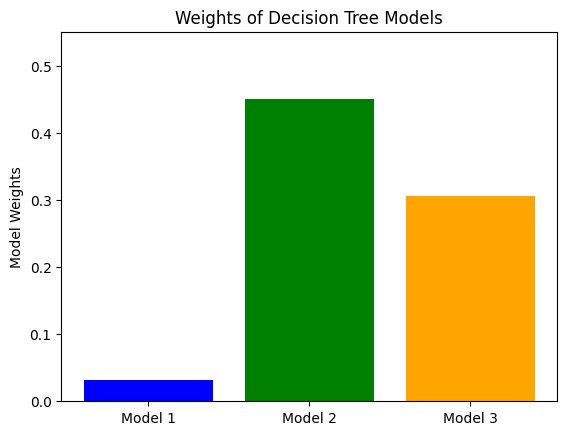

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the following variables defined:
# alpha1, alpha2, alpha3

# Bar plot for model weights
models = ['Model 1', 'Model 2', 'Model 3']
weights = [abs(alpha1), abs(alpha2), abs(alpha3)]

plt.bar(models, weights, color=['blue', 'green', 'orange'])
plt.ylim(0, max(weights) + 0.1)
plt.ylabel('Model Weights')
plt.title('Weights of Decision Tree Models')
plt.show()


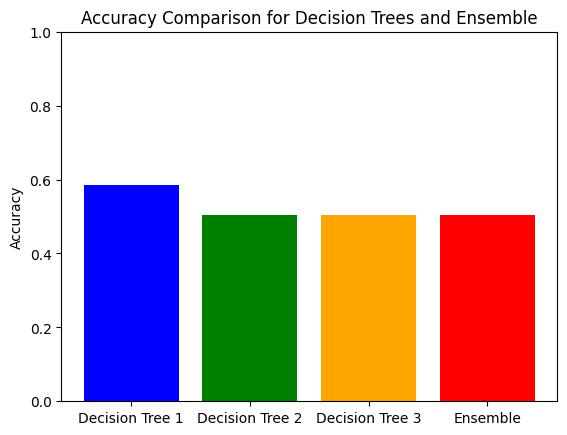

In [ ]:
import matplotlib.pyplot as plt

# Accuracy for each individual Decision Tree
accuracy_ada_1 = np.mean(Y_test_mapped == y_pred_ada_1)
accuracy_ada_2 = np.mean(Y_test_mapped == y_pred_ada_2)
accuracy_ada_3 = np.mean(Y_test_mapped == y_pred_ada_3)

# Accuracy for the ensemble
alpha_sum = alpha1 + alpha2 + alpha3
y_pred_ensemble = (alpha1/alpha_sum)*y_pred_ada_1 + (alpha2/alpha_sum)*y_pred_ada_2 + (alpha3/alpha_sum)*y_pred_ada_3
y_pred_ensemble_final = np.round(y_pred_ensemble)
accuracy_ensemble = np.mean(Y_test_mapped == y_pred_ensemble_final)

# Plotting
labels = ['Decision Tree 1', 'Decision Tree 2', 'Decision Tree 3', 'Ensemble']
accuracies = [accuracy_ada_1, accuracy_ada_2, accuracy_ada_3, accuracy_ensemble]

# Bar plot for individual Decision Trees and Ensemble
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Decision Trees and Ensemble')
plt.show()


The weights of each individual stump can be seen to never exceed 0.4 which shows that the model has somewhat managed to prevent over0prioritizing certain weights.

The weak classifier used here is a decision stump, a special form of decision tree which has maximum depth as 1. We have created 3 instances of weak classifiers and taken the summation of their predictions in order to make the final prediction as is customary for the AdaBoost Algorithm. It is clear that it is better suited for binary classification instead of multi-class classification.


Running the algorithm several times and taking the average across 6 runs, we got the average accuracy as 53.45%.

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [ ]:
import numpy as np                  # for basic operations over arrays
from scipy.spatial import distance  # to compute the Gaussian kernel
import cvxopt                       # to solve the dual optimization problem
import copy                         # to copy numpy arrays


class SVM:
    linear = lambda x, xࠤ , c=0: x @ xࠤ .T
    polynomial = lambda x, xࠤ , Q=5: (1 + x @ xࠤ.T)**Q
    rbf = lambda x, xࠤ, γ=20: np.exp(-γ * distance.cdist(x, xࠤ,'sqeuclidean'))
    kernel_funs = {'linear': linear, 'polynomial': polynomial, 'rbf': rbf}

    def __init__(self, kernel='rbf', C=1, k=2):
        # set the hyperparameters
        self.kernel_str = kernel
        self.kernel = SVM.kernel_funs[kernel]
        self.C = C                  # regularization parameter
        self.k = k                  # kernel parameter

        # training data and support vectors
        self.X, y = None, None
        self.αs = None

        # for multi-class classification
        self.multiclass = False
        self.clfs = []

# This is useless here (only for notebook)
SVMClass = lambda func: setattr(SVM, func.__name__, func) or func


@SVMClass
def fit(self, X, y, eval_train=False):
    if len(np.unique(y)) > 2:
        self.multiclass = True
        return self.multi_fit(X, y, eval_train)

    # relabel if needed
    if set(np.unique(y)) == {0, 1}: y[y == 0] = -1
    # ensure y has dimensions Nx1
    self.y = y.reshape(-1, 1).astype(np.double) # Has to be a column vector
    self.X = X
    N = X.shape[0]

    # compute the kernel over all possible pairs of (x, x') in the data
    self.K = self.kernel(X, X, self.k)

    # For 1/2 x^T P x + q^T x
    P = cvxopt.matrix(self.y @ self.y.T * self.K)
    q = cvxopt.matrix(-np.ones((N, 1)))

    # For Ax = b
    A = cvxopt.matrix(self.y.T)
    b = cvxopt.matrix(np.zeros(1))

    # For Gx <= h
    G = cvxopt.matrix(np.vstack((-np.identity(N),
                                 np.identity(N))))
    h = cvxopt.matrix(np.vstack((np.zeros((N,1)),
                                 np.ones((N,1)) * self.C)))

    # Solve
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    self.αs = np.array(sol["x"])

    # Maps into support vectors
    self.is_sv = ((self.αs > 1e-3) & (self.αs <= self.C)).squeeze()
    self.margin_sv = np.argmax((1e-3 < self.αs) & (self.αs < self.C - 1e-3))

    if eval_train:
      print(f"Finished training with accuracy {self.evaluate(X, y)}")


@SVMClass
def multi_fit(self, X, y, eval_train=False):
    self.k = len(np.unique(y))      # number of classes
    # for each pair of classes
    for i in range(self.k):
        # get the data for the pair
        Xs, Ys = X, copy.copy(y)
        # change the labels to -1 and 1
        Ys[Ys!=i], Ys[Ys==i] = -1, +1
        # fit the classifier
        clf = SVM(kernel=self.kernel_str, C=self.C, k=self.k)
        clf.fit(Xs, Ys)
        # save the classifier
        self.clfs.append(clf)
    if eval_train:
      print(f"Finished training with accuracy {self.evaluate(X, y)}")

@SVMClass
def predict(self, X_t):
    if self.multiclass: return self.multi_predict(X_t)
    xₛ, yₛ = self.X[self.margin_sv, np.newaxis], self.y[self.margin_sv]
    αs, y, X= self.αs[self.is_sv], self.y[self.is_sv], self.X[self.is_sv]

    b = yₛ - np.sum(αs * y * self.kernel(X, xₛ, self.k), axis=0)
    score = np.sum(αs * y * self.kernel(X, X_t, self.k), axis=0) + b
    return np.sign(score).astype(int), score

@SVMClass
def multi_predict(self, X):
    # get the predictions from all classifiers
    preds = np.zeros((X.shape[0], self.k))
    for i, clf in enumerate(self.clfs):
        _, preds[:, i] = clf.predict(X)

    # get the argmax and the corresponding score
    return np.argmax(preds, axis=1)

@SVMClass
def evaluate(self, X,y):
    outputs = self.predict(X)
    accuracy = np.sum(outputs == y) / len(y)
    return round(accuracy, 2)


from sklearn.datasets import make_classification
import numpy as np

# Load the dataset
np.random.seed(1)
X, y = make_classification(n_samples=50, n_features=2,
          n_redundant=0, n_informative=2, n_classes=4,
          n_clusters_per_class=1,  class_sep=0.3)

# Test SVM

# Define k values
k_values = [1, 5, 10, 20]

# Lists to store training and test accuracies for each k
train_accuracies = []
test_accuracies = []

# Test SVM with different values of k
for k_value in k_values:
    svm = SVM(kernel='rbf', k=k_value)
    svm.fit(xnp, Y_train_mapped, eval_train=True)

    # Make predictions on the testing data
    y_pred = svm.predict(xnp)

    # Convert predictions back to original class labels
    y_pred_mapped = [reverse_mapping[i] for i in y_pred]

    # Evaluate the accuracy of the SVM on the training data
    accuracy_train = np.mean(Y_train_mapped == y_pred)
    train_accuracies.append(accuracy_train)

    # Evaluate the accuracy on the testing data
    y_test_pred = svm.predict(xtnp)
    accuracy_test = np.mean(Y_test_mapped == y_test_pred)
    test_accuracies.append(accuracy_test)
    print(f"SVM with k={k_value} - Training Accuracy: {accuracy_train}, Test Accuracy: {accuracy_test}")

Finished training with accuracy 0.96
SVM with k=1 - Training Accuracy: 0.9586666666666667, Test Accuracy: 0.5578093306288032
Finished training with accuracy 0.96
SVM with k=5 - Training Accuracy: 0.9586666666666667, Test Accuracy: 0.5578093306288032
Finished training with accuracy 0.96
SVM with k=10 - Training Accuracy: 0.9586666666666667, Test Accuracy: 0.5578093306288032
Finished training with accuracy 0.96
SVM with k=20 - Training Accuracy: 0.9586666666666667, Test Accuracy: 0.5578093306288032


## **_4.2 Insights drawn (plots, markdown explanations)_**

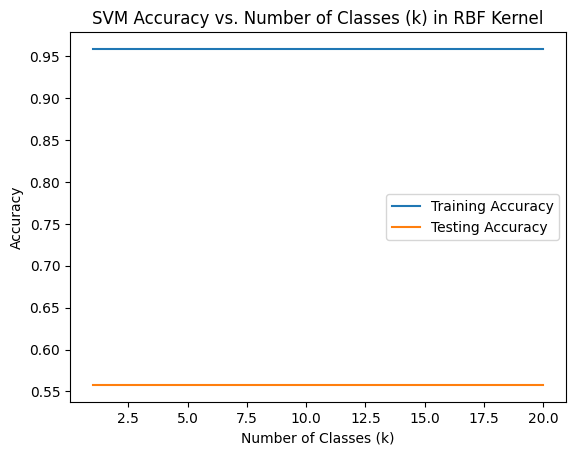

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracies for different values of k
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Classes (k)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Number of Classes (k) in RBF Kernel')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label, pred_label] += 1

    return matrix

num_classes = len(np.unique(Y_test_mapped))
conf_matrix = confusion_matrix(Y_test_mapped, y_test_pred, num_classes)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[134  25   1   9]
 [ 51  45   7  25]
 [  5  25  16  47]
 [  3   7  13  80]]


The confusion matrix shows a large trace, implying a good number of true positives. Members of Class 1 were misclassified the most due to the existence of narrow ranges on either side (Class 0 and Class 2). Class 3, being the broadest class, has the least number of misclassifications.


As seen from the plot, test accuracy is lower than the training accuracy as the model slightly overfit to our current dataset. We have tried adjusting k-values and checking the impact on testing vs training accuracy and see that increasing k-values causes negligible change in the test and training accuracies. The best test accuracy possible with minimal overfitting is 55.78%. This shows that SVMs are generally better suited for binary rather than multi-class classification due to the issues arising from One-vs-One or One-vs-All Strategies which may leave a region of the dataset unclassified.

# **_5. Overall Conclusion_**

Recurring issue identified: the size of the dataset is too small for the algorithms to efficiently classify the inputs under four different class labels. This leads to overfitting.

Overfitting can majorly be reduced by increasing the size of dataset. Since this is not an option after performing preliminary PCA on our dataset, we took necessary steps such as hyperparameter optimization in order to keep overfitting to a minimum.

The models in increasing order of test accuracy are: Decision Tree, AdaBoost and Multi-Class SVM with accuracies of 48%, 54% and 56% respectively. The reasons for the same have been explored in their respective insight sections.



# **_6. References_**





Link to Multi-Class SVM Implementation Reference->

https://towardsdatascience.com/implement-multiclass-svm-from-scratch-in-python-b141e43dc084#25b3

Link to Decision Tree Implementation Reference->

https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

Links to Adaboost Reference and Model for Weak Classifiers->

https://dafriedman97.github.io/mlbook/content/c6/s2/boosting.html
        https://dafriedman97.github.io/mlbook/content/c5/s2/regression_tree.html